## Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from scipy import stats

In [4]:
import os

figures_dir = '/content/figures'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

In [5]:
import warnings
warnings.simplefilter("ignore")

## df Import

In [6]:
!mkdir dataset
!wget "https://raw.githubusercontent.com/CulenS/CHF-Prediction/main/CHF%20NRC%20Data%20(csv).csv" -O dataset/CHF_Dataset.csv

--2024-05-10 04:01:50--  https://raw.githubusercontent.com/CulenS/CHF-Prediction/main/CHF%20NRC%20Data%20(csv).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 903844 (883K) [text/plain]
Saving to: ‘dataset/CHF_Dataset.csv’

dataset/CHF_Dataset 100%[===================>] 882.66K  --.-KB/s    in 0.04s   

2024-05-10 04:01:51 (22.5 MB/s) - ‘dataset/CHF_Dataset.csv’ saved [903844/903844]



In [7]:
Kaustubh_df = pd.read_csv('/content/dataset/CHF_Dataset.csv')

In [8]:
df = Kaustubh_df.copy()
df.head()

,S. No.,Data,D (m),L (m),P (kPa),G (kg m-2s-1),X_chf,Dh_in (kJ/kg),CHF (kW m-2),T_in (°C),Reference
0,1,25,0.004,0.4,100.0,78,0.84,317,442,23.9,*Lowdermilk 1958
1,2,26,0.004,0.4,100.0,143,0.79,317,757,23.9,*Lowdermilk 1958
2,3,27,0.004,0.4,100.0,204,0.70,317,978,23.9,*Lowdermilk 1958
3,4,28,0.004,0.4,100.0,272,0.73,317,1325,23.9,*Lowdermilk 1958
4,5,29,0.004,0.4,100.0,421,0.62,317,1798,23.9,*Lowdermilk 1958


## Data Visualization

In [9]:
df.columns

Index(['S. No.', 'Data', 'D (m)', 'L (m)', 'P (kPa)', 'G (kg m-2s-1)', 'X_chf',
       'Dh_in (kJ/kg)', 'CHF (kW m-2)', 'T_in (°C)', 'Reference'],
      dtype='object')

In [10]:
cols = ['D (m)', 'L (m)', 'P (kPa)', 'G (kg m-2s-1)', 'Dh_in (kJ/kg)', 'CHF (kW m-2)', 'T_in (°C)']

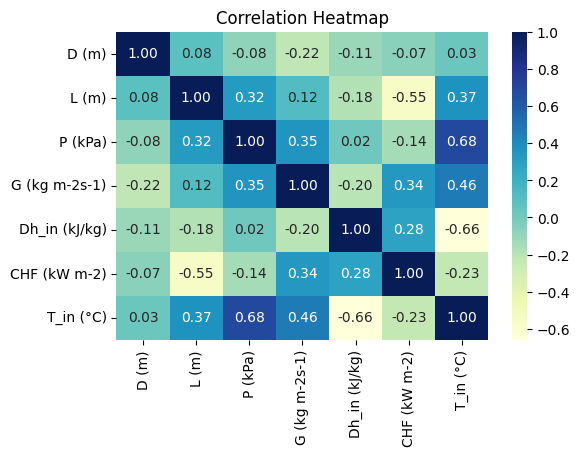

In [11]:
cm = df[cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig(os.path.join(figures_dir, 'Correlation Heatmap.png'))
plt.show()

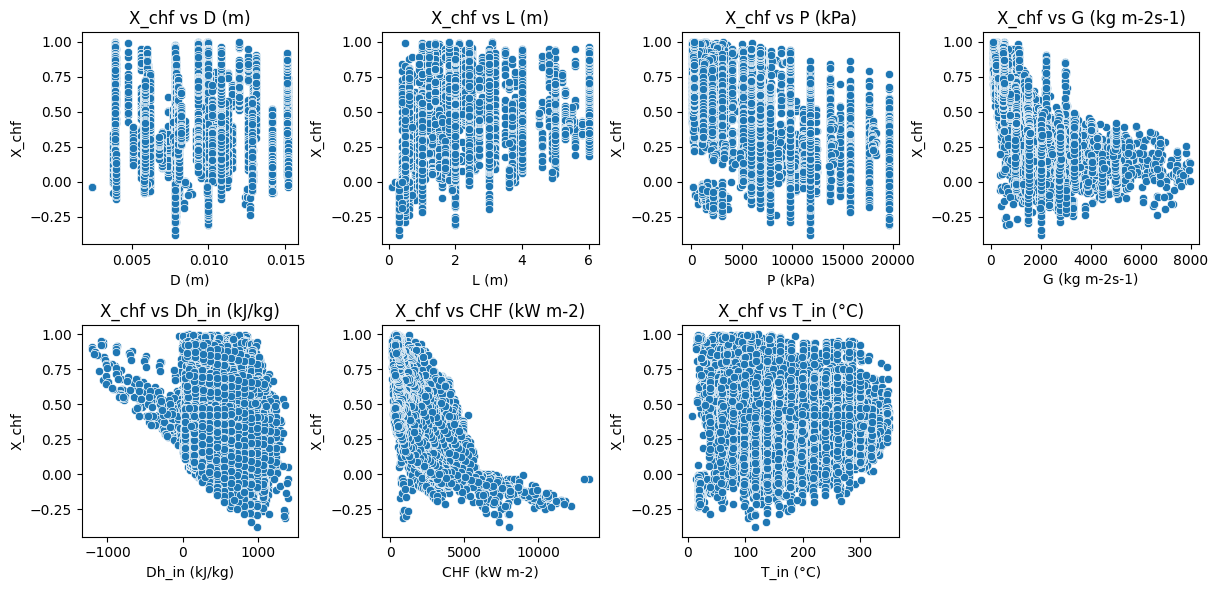

In [12]:
plt.figure(figsize=(12, 6))

for col in cols:
  plt.subplot(2, 4, cols.index(col) + 1)
  sns.scatterplot(df, x = col, y = 'X_chf')
  plt.title('X_chf vs ' + str(col))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'Scatter Plot.png'))
plt.show()

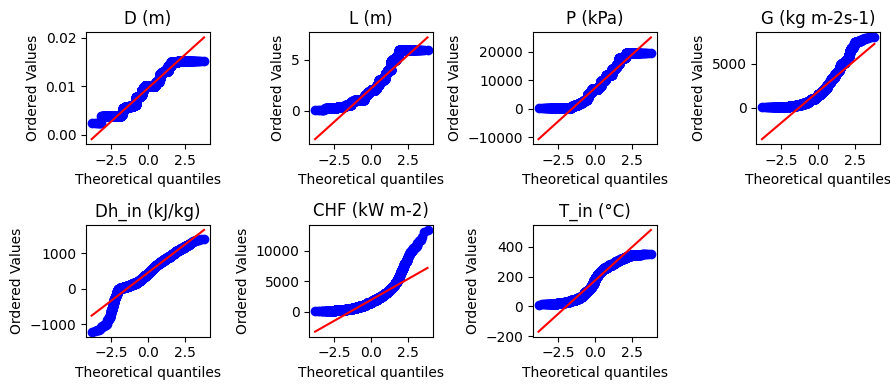

In [13]:
cols = ['D (m)', 'L (m)', 'P (kPa)', 'G (kg m-2s-1)', 'Dh_in (kJ/kg)', 'CHF (kW m-2)', 'T_in (°C)']
X_chf = {col: df[col] for col in cols}

plt.figure(figsize=(9, 4))
for i, col in enumerate(X_chf.keys()):
    plt.subplot(2, 4, i+1)
    stats.probplot(X_chf[col], dist="norm", plot=plt)
    plt.title(f'{col}')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'Q-Q Plot.png'))
plt.show()

## Data Preprocessing

#### removal of additional columns

In [14]:
df = df.drop(['S. No.'], axis = 1)
df.head()

,Data,D (m),L (m),P (kPa),G (kg m-2s-1),X_chf,Dh_in (kJ/kg),CHF (kW m-2),T_in (°C),Reference
0,25,0.004,0.4,100.0,78,0.84,317,442,23.9,*Lowdermilk 1958
1,26,0.004,0.4,100.0,143,0.79,317,757,23.9,*Lowdermilk 1958
2,27,0.004,0.4,100.0,204,0.70,317,978,23.9,*Lowdermilk 1958
3,28,0.004,0.4,100.0,272,0.73,317,1325,23.9,*Lowdermilk 1958
4,29,0.004,0.4,100.0,421,0.62,317,1798,23.9,*Lowdermilk 1958


In [15]:
df.dtypes

Data              object
D (m)            float64
L (m)            float64
P (kPa)          float64
G (kg m-2s-1)      int64
X_chf            float64
Dh_in (kJ/kg)      int64
CHF (kW m-2)       int64
T_in (°C)        float64
Reference         object
dtype: object

In [16]:
df['Data'].unique()

array(['25', '26', '27', ..., '6359', '6360', '6361'], dtype=object)

In [17]:
df['Reference'].nunique()

33

In [18]:
df['Reference'].unique()

array(['*Lowdermilk 1958', '*Smolin 1962 from Kirillov data base',
       '*Babcock&Hood 1962', '*Swenson 1962', '*Hood 1962',
       '*Hood &isakoff 1962', '*Alessandrini_et_al_1963',
       '*Becker 1965 AE-177 Table 1.1',
       '*Becker 1963 AE 114 pt2, Also Becker 1965 AE-177 table 1.2',
       '*Becker 1965 AE-177 Table 1.2; some runs are same as in Table 1.2 AE-178',
       '*Becker 1965 AE-177 Table 1.2; some runs are same as in Table 1.2 AE-178 (also in Becker 1964)',
       '*Becker 1965 AE-177 Table 1.3; some runs are same as in Table 1.3 AE-178',
       '*Bergles 1963', '*Alekseev 1964 taken from Kirillov data base',
       '*Peterlongo et al 1966', '*Tong 1994', '*Zenkevich et al 1964',
       '*Becker et al 1965 AE-178 Table 1.4 and Table 1.4 of AE-177',
       '*Unable to find source of these data', '*Bennett 1965 AERE R5055',
       '*Burch & Hufschmidt 1965', '*Griffel 1965', '*Hewitt 1965',
       '*Matzner et al 1965', '*Waters et al 1965', '*Judd & Wilson 1966',
   

In [19]:
df = df.drop(['Data', 'Reference'], axis = 1)
df.head(3)

,D (m),L (m),P (kPa),G (kg m-2s-1),X_chf,Dh_in (kJ/kg),CHF (kW m-2),T_in (°C)
0,0.004,0.4,100.0,78,0.84,317,442,23.9
1,0.004,0.4,100.0,143,0.79,317,757,23.9
2,0.004,0.4,100.0,204,0.70,317,978,23.9


#### checking & removal of null values

In [20]:
df.isnull().sum()

D (m)            0
L (m)            0
P (kPa)          0
G (kg m-2s-1)    0
X_chf            0
Dh_in (kJ/kg)    0
CHF (kW m-2)     0
T_in (°C)        0
dtype: int64

#### checking & removal of outliers

In [21]:
def remove_outliers(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    filtered_rows = (z_scores < threshold).all(axis=1)
    return df[filtered_rows]

df_noOUT = remove_outliers(df)
df_noOUT.head()

,D (m),L (m),P (kPa),G (kg m-2s-1),X_chf,Dh_in (kJ/kg),CHF (kW m-2),T_in (°C)
0,0.004,0.4,100.0,78,0.84,317,442,23.9
1,0.004,0.4,100.0,143,0.79,317,757,23.9
2,0.004,0.4,100.0,204,0.70,317,978,23.9
3,0.004,0.4,100.0,272,0.73,317,1325,23.9
4,0.004,0.4,100.0,421,0.62,317,1798,23.9


#### checking & removal of duplicates

In [22]:
df_noOUT.shape

(9575, 8)

In [23]:
df_noDupl = df_noOUT.drop_duplicates()
df_noDupl.head()

,D (m),L (m),P (kPa),G (kg m-2s-1),X_chf,Dh_in (kJ/kg),CHF (kW m-2),T_in (°C)
0,0.004,0.4,100.0,78,0.84,317,442,23.9
1,0.004,0.4,100.0,143,0.79,317,757,23.9
2,0.004,0.4,100.0,204,0.70,317,978,23.9
3,0.004,0.4,100.0,272,0.73,317,1325,23.9
4,0.004,0.4,100.0,421,0.62,317,1798,23.9


In [24]:
df_noDupl.shape

(9446, 8)

#### scaling & check

In [25]:
scaler = StandardScaler()
df_scaled = df_noDupl.copy()

col = ['D (m)', 'L (m)', 'P (kPa)', 'G (kg m-2s-1)', 'X_chf', 'Dh_in (kJ/kg)', 'CHF (kW m-2)', 'T_in (°C)']
scaler.fit(df_noDupl[col])
df_scaled[col] = scaler.transform(df_noDupl[col])

In [26]:
feature_stats = df_scaled.describe().transpose()
is_scaled = (feature_stats['mean'].abs() < 0.1) & (feature_stats['std'] > 0.9) & (feature_stats['std'] < 1.1)

print("Features and scaling status:")
print(is_scaled)

Features and scaling status:
D (m)            True
L (m)            True
P (kPa)          True
G (kg m-2s-1)    True
X_chf            True
Dh_in (kJ/kg)    True
CHF (kW m-2)     True
T_in (°C)        True
dtype: bool


#### PCA

In [27]:
pca = PCA()
df_noTarg = df_scaled.drop(['X_chf'], axis = 1)

pca.fit(df_noTarg)
pca_comp = pca.transform(df_noTarg)

In [28]:
df_pca = pd.DataFrame(data=pca_comp, columns=[f'PC{i+1}' for i in range(pca_comp.shape[1])])

df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.040882,-0.673188,0.183857,2.755584,-0.900577,-0.578405,0.403869
1,-2.086167,-0.477526,0.120458,2.685475,-0.833310,-0.435574,0.432038
2,-2.114027,-0.334298,0.075648,2.636473,-0.779943,-0.341515,0.451901
3,-2.164827,-0.120152,0.005886,2.559199,-0.707286,-0.182734,0.482909
4,-2.219770,0.193526,-0.090416,2.454542,-0.585672,0.011211,0.525539
...,...,...,...,...,...,...,...
9441,2.315891,-2.131854,0.179633,-1.678194,1.027708,0.618624,0.093998
9442,2.587190,-2.191693,-0.066508,-1.541629,0.929325,0.650605,0.100829
9443,2.872094,-2.266725,-0.323253,-1.390639,0.826390,0.671784,0.117247
9444,2.870618,-2.257212,-0.326116,-1.393730,0.830226,0.677289,0.118513


## Training

In [29]:
X = df_pca
Y = df_scaled['X_chf']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=41)

In [31]:
X_train.shape

(8501, 7)

In [32]:
X_test.shape

(945, 7)

#### model (NN)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2625 (10.25 KB)
Trainable params: 2625 (10.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### train

In [35]:
model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
266/266 [==============================] - 1s 2ms/step - loss: 0.1672
Epoch 2/50
266/266 [==============================] - 0s 2ms/step - loss: 0.0420
Epoch 3/50
266/266 [==============================] - 1s 2ms/step - loss: 0.0310
Epoch 4/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0257
Epoch 5/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0220
Epoch 6/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0207
Epoch 7/50
266/266 [==============================] - 1s 5ms/step - loss: 0.0186
Epoch 8/50
266/266 [==============================] - 2s 6ms/step - loss: 0.0171
Epoch 9/50
266/266 [==============================] - 1s 4ms/step - loss: 0.0162
Epoch 10/50
266/266 [==============================] - 1s 4ms/step - loss: 0.0149
Epoch 11/50
266/266 [==============================] - 1s 4ms/step - loss: 0.0145
Epoch 12/50
266/266 [==============================] - 1s 4ms/step - loss: 0.0142
Epoch 13/50
266/266 [====

## Prediction & Summary

#### evaluation

In [36]:
Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

30/30 [==============================] - 0s 2ms/step


#### result

In [37]:
print(f"RMSE:       {rmse:.7f}")
print(f"R2 Score:   {r2:.7f}")

RMSE:       0.0828810
R2 Score:   0.9930886


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

X = df_pca
Y = df_scaled['X_chf']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=41)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

# Support Vector Machine (SVM) Model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)

# Gradient Boosting Model (XGBoost)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
r2_rf = r2_score(Y_test, Y_pred_rf)

rmse_svm = np.sqrt(mean_squared_error(Y_test, Y_pred_svm))
r2_svm = r2_score(Y_test, Y_pred_svm)

rmse_xgb = np.sqrt(mean_squared_error(Y_test, Y_pred_xgb))
r2_xgb = r2_score(Y_test, Y_pred_xgb)

print("Random Forest Model:")
print(f"RMSE:       {rmse_rf:.7f}")
print(f"R2 Score:   {r2_rf:.7f}")

print("\nSupport Vector Machine (SVM) Model:")
print(f"RMSE:       {rmse_svm:.7f}")
print(f"R2 Score:   {r2_svm:.7f}")

print("\nXGBoost Model:")
print(f"RMSE:       {rmse_xgb:.7f}")
print(f"R2 Score:   {r2_xgb:.7f}")

Random Forest Model:
RMSE:       0.1457695
R2 Score:   0.9786210

Support Vector Machine (SVM) Model:
RMSE:       0.1194217
R2 Score:   0.9856510

XGBoost Model:
RMSE:       0.1406613
R2 Score:   0.9800931


In [39]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# ANN model
Y_pred_ann = model.predict(X_test)
mae_ann = mean_absolute_error(Y_test, Y_pred_ann)
r2_ann = r2_score(Y_test, Y_pred_ann)

# Random Forest model
Y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# SVM model
Y_pred_svm = svm_model.predict(X_test)
mae_svm = mean_absolute_error(Y_test, Y_pred_svm)
r2_svm = r2_score(Y_test, Y_pred_svm)

# XGBoost model
Y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(Y_test, Y_pred_xgb)
r2_xgb = r2_score(Y_test, Y_pred_xgb)

# Print the results
print("Artificial Neural Network (ANN) Model:")
print(f"Mean Absolute Error (MAE): {mae_ann:.7f}")
print(f"Coefficient of Determination (R^2): {r2_ann:.7f}")

print("\nRandom Forest Model:")
print(f"Mean Absolute Error (MAE): {mae_rf:.7f}")
print(f"Coefficient of Determination (R^2): {r2_rf:.7f}")

print("\nSupport Vector Machine (SVM) Model:")
print(f"Mean Absolute Error (MAE): {mae_svm:.7f}")
print(f"Coefficient of Determination (R^2): {r2_svm:.7f}")

print("\nXGBoost Model:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.7f}")
print(f"Coefficient of Determination (R^2): {r2_xgb:.7f}")

30/30 [==============================] - 0s 1ms/step
Artificial Neural Network (ANN) Model:
Mean Absolute Error (MAE): 0.0597523
Coefficient of Determination (R^2): 0.9930886

Random Forest Model:
Mean Absolute Error (MAE): 0.0917073
Coefficient of Determination (R^2): 0.9786210

Support Vector Machine (SVM) Model:
Mean Absolute Error (MAE): 0.0839925
Coefficient of Determination (R^2): 0.9856510

XGBoost Model:
Mean Absolute Error (MAE): 0.1006379
Coefficient of Determination (R^2): 0.9800931
